<a href="https://colab.research.google.com/github/Bdempsey03/DDoS_Prevention/blob/main/DDoS_Prevention_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import sklearn.metrics as sk_metrics
from sklearn import tree
import sklearn.metrics as sk_metrics
from sklearn.metrics import classification_report

from google.colab import drive

In [ ]:
# Import our cleaned dataset
drive.mount('/content/drive/')
dataUDP = pd.read_csv('/content/drive/My Drive/DrDoS_UDP_clean.csv')
dataDNS = pd.read_csv('/content/drive/My Drive/DrDoS_DNS_clean.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data_slice_UDP = dataUDP[:80000]
train_data_UDP = data_slice_UDP.sample(frac=0.75,random_state=1)
test_data_UDP = data_slice_UDP.drop(train_data_UDP.index)
#split label into Y
x_train_UDP, y_train_UDP = train_data_UDP.iloc[:, 2:-1], train_data_UDP.iloc[:, -1]
x_test_UDP, y_test_UDP = test_data_UDP.iloc[:, 2:-1], test_data_UDP.iloc[:, -1]


#DNS
data_slice_DNS = dataDNS[:30000]
train_data_DNS = data_slice_DNS.sample(frac=0.75,random_state=1)
test_data_DNS = data_slice_DNS.drop(train_data_DNS.index)
#split label into Y
x_train_DNS, y_train_DNS = train_data_DNS.iloc[:, 2:-1], train_data_DNS.iloc[:, -1]
x_test_DNS, y_test_DNS = test_data_DNS.iloc[:, 2:-1], test_data_DNS.iloc[:, -1]



In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(x_train_UDP, y_train_UDP)
y_pred_UDP = model.predict(x_test_UDP)

model = tree.DecisionTreeClassifier()
model.fit(x_train_DNS, y_train_DNS)
y_pred_DNS = model.predict(x_test_DNS)

In [ ]:
cnf_matrix_UDP = sk_metrics.confusion_matrix(y_test_UDP, y_pred_UDP)

cnf_matrix_DNS = sk_metrics.confusion_matrix(y_test_DNS, y_pred_DNS)


                    precision    recall  f1-score   support

Legitimate Traffic       1.00      1.00      1.00       218
      DDoS Packets       1.00      1.00      1.00     19782

          accuracy                           1.00     20000
         macro avg       1.00      1.00      1.00     20000
      weighted avg       1.00      1.00      1.00     20000



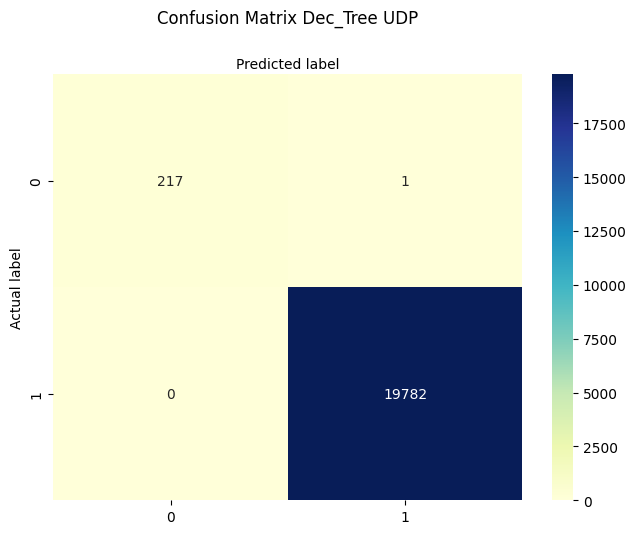

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_UDP), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Dec_Tree UDP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
target_names = ['Legitimate Traffic','DDoS Packets']
print(classification_report(y_test_UDP, y_pred_UDP, target_names=target_names))




                    precision    recall  f1-score   support

Legitimate Traffic       1.00      1.00      1.00       418
      DDoS Packets       1.00      1.00      1.00      7082

          accuracy                           1.00      7500
         macro avg       1.00      1.00      1.00      7500
      weighted avg       1.00      1.00      1.00      7500



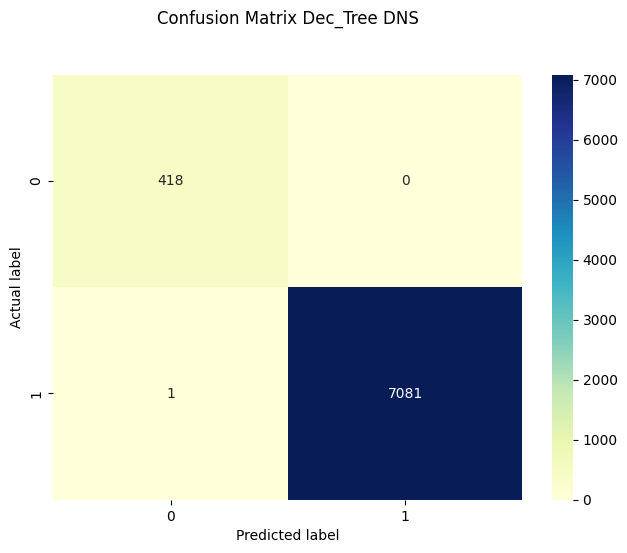

In [ ]:
sns.heatmap(pd.DataFrame(cnf_matrix_DNS), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Dec_Tree DNS', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
target_names = ['Legitimate Traffic','DDoS Packets']
print(classification_report(y_test_DNS, y_pred_DNS, target_names=target_names))